In [0]:
!pip install descartes
!pip install geopandas
import pandas as pd
import numpy as np
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
from shapely import wkt
%matplotlib inline

C:\Users\raona\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\raona\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [0]:
df = pd.read_csv('taxi_zones.csv')
df.head()

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    263 non-null    int64  
 1   Shape_Leng  263 non-null    float64
 2   the_geom    263 non-null    object 
 3   Shape_Area  263 non-null    float64
 4   zone        263 non-null    object 
 5   LocationID  263 non-null    int64  
 6   borough     263 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 14.5+ KB


In [0]:
df_pu = pd.read_csv('PU_Zone.csv')
df_do = pd.read_csv('DO_Zone.csv')
df_viz = pd.read_csv('data_viz_by_zone.csv')

In [0]:
df = df.merge(df_pu,how='left',on='zone')
df = df.merge(df_do,how='left',on='zone')
df = df.merge(df_viz,how='left',on='zone')
df = df.fillna(0)

In [0]:
df = df.astype({'do_count': int})

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OBJECTID         263 non-null    int64  
 1   Shape_Leng       263 non-null    float64
 2   the_geom         263 non-null    object 
 3   Shape_Area       263 non-null    float64
 4   zone             263 non-null    object 
 5   LocationID       263 non-null    int64  
 6   borough          263 non-null    object 
 7   pu_count         263 non-null    int64  
 8   do_count         263 non-null    int32  
 9   overnight_count  263 non-null    int64  
 10  rushhour_count   263 non-null    int64  
 11  weekend_count    263 non-null    int64  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 23.8+ KB


In [0]:
df.head()

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough,pu_count,do_count,overnight_count,rushhour_count,weekend_count
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR,18230,6484967,6909,13095,7265
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens,2418,2767,466,1539,1091
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx,2413944,2293562,591424,1619353,685398
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan,4085398,3436789,1411245,2504890,1472314
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island,293055,272603,59058,191613,84812


In [0]:
df_geo= df
df_geo["the_geom"] = df_geo["the_geom"].apply(wkt.loads)

In [0]:
df_geo = geopandas.GeoDataFrame(df_geo,geometry='the_geom')

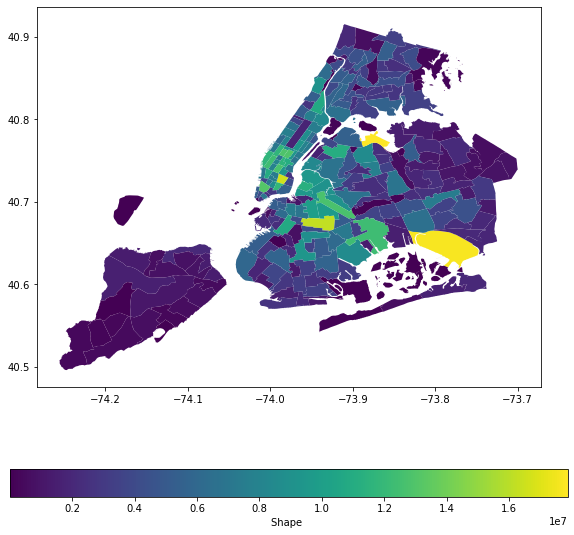

In [0]:
#street_map = gpd.read_file('cb_2018_36_bg_500k.shx')
fig, ax = plt.subplots(figsize=(10,10))
df_geo.plot(column="pu_count",legend= True, legend_kwds={"label": "Shape ","orientation":"horizontal"},ax=ax)
plt.savefig("Pickup_total.png")

<AxesSubplot:>

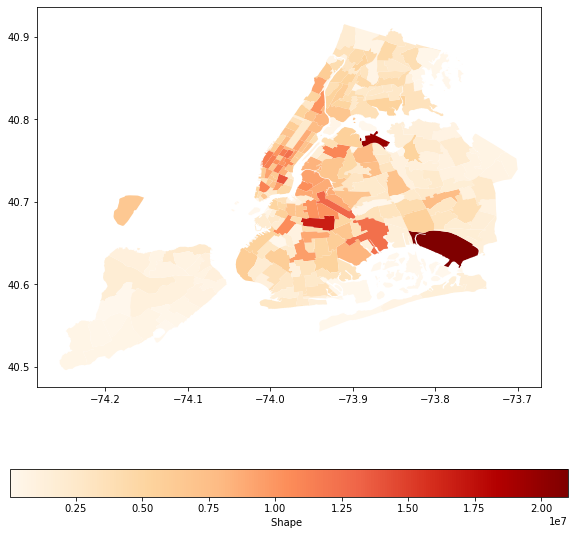

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
df_geo.plot(column="do_count",legend= True, legend_kwds={"label": "Shape ","orientation":"horizontal"},cmap='OrRd',ax=ax)

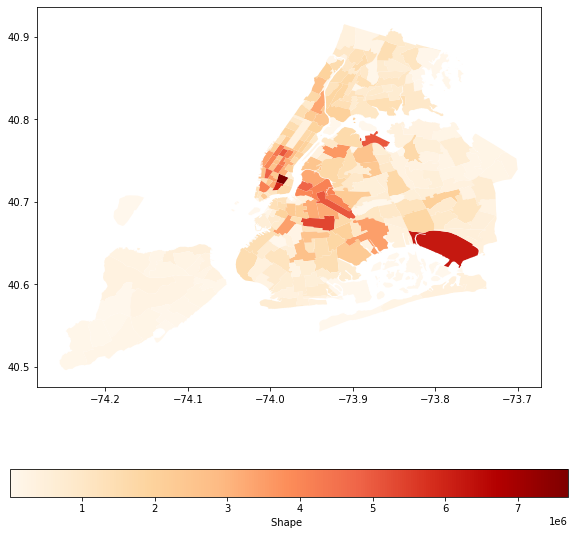

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
df_geo.plot(column="overnight_count",legend= True, legend_kwds={"label": "Shape ","orientation":"horizontal"},cmap='OrRd',ax=ax)
plt.savefig("Pickup_overnight.png")

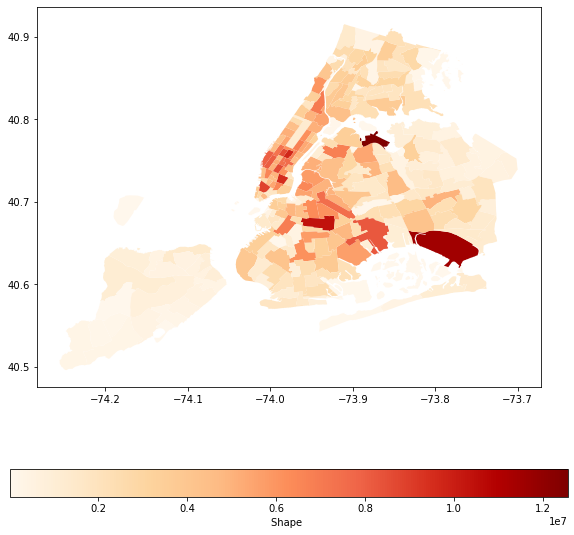

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
df_geo.plot(column="rushhour_count",legend= True, legend_kwds={"label": "Shape ","orientation":"horizontal"},cmap='OrRd',ax=ax)
plt.savefig("Pickup_rushhour.png")

<AxesSubplot:>

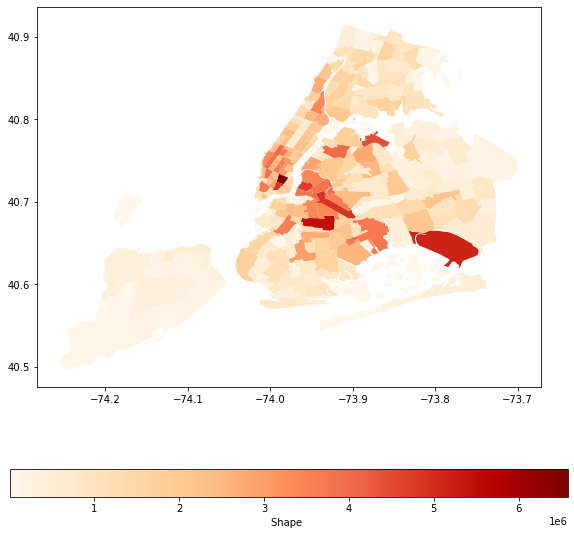

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
df_geo.plot(column="weekend_count",legend= True, legend_kwds={"label": "Shape ","orientation":"horizontal"},cmap='OrRd',ax=ax)

In [0]:
df1.to_csv('Trip.csv', index=False)